# IMDB Phân tích quan điểm bài toán quan điểm đánh giá các bộ phim
(Thư viện tensorflow)
* Tham khảo: [WILDML blog post](http://www.wildml.com/2015/12/implementing-a-cnn-for-text-classification-in-tensorflow/)
* Dữ liệu: [Large Movie Review Dataset](http://ai.stanford.edu/~amaas/data/sentiment/)

Download dữ liệu từ link sau : https://drive.google.com/file/d/1ZIfW3HzIzQyxfEx0pcWjtq0AS5Gnrs31/view?usp=sharing

In [ ]:
# Import packages
import os
import re
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import shuffle
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tflearn.data_utils import VocabularyProcessor

# Giải nén file dữ liệu, chỉ định đường dẫn vào các thư mục tương ứng
train_pos_dir = 'aclImdb/train/pos/'
train_neg_dir = 'aclImdb/train/neg/'
test_pos_dir = 'aclImdb/test/pos/'
test_neg_dir = 'aclImdb/test/neg/'

# Kích thước dữ liệu
data_set_size = 12500

## Câu hỏi 1: Đọc dữ liệu
- Đọc dữ liệu văn bản của các tập huấn luyện, kiểm tra

In [ ]:
# Đọc dữ liệu
# train_pos = Dữ liệu về quan điểm tích cực - tập huấn luyện, lưu vào biến
#### YOUR CODE HERE ####

# train_neg = Dữ liệu về quan điểm tiêu cực - tập huấn luyện, lưu biến
#### YOUR CODE HERE ####

# test_pos =  Dữ liệu về quan điểm tích cực - tập kiểm tra
#### YOUR CODE HERE ####

# test_neg = Dữ liệu về quan điểm tiêu cực - tập kiểm tra
#### YOUR CODE HERE ####
        
# Làm sạch dữ liệu
stop_words = set(stopwords.words("english"))

def parse_html(data):
    data = BeautifulSoup(data, 'lxml').get_text() # Xóa các thẻ xml
    data = re.sub("[^a-zA-Z]"," ", data) # Xóa các ký tự đặc biệt (không thuộc a-z hoặc A-Z)
    data = ' '.join([x for x in data.lower().split() if not x in stop_words]) #Xóa stopwords
    return data    
    
for i in xrange(data_set_size):
    train_pos[i] = parse_html(train_pos[i])
    train_neg[i] = parse_html(train_neg[i])
    test_pos[i] = parse_html(test_pos[i])
    test_neg[i] = parse_html(test_neg[i])    
    
total_x = np.concatenate([train_pos, train_neg, test_pos, test_neg])
train_y = np.concatenate([[[0, 1] for _ in xrange(data_set_size)], 
                          [[1, 0] for _ in xrange(data_set_size)]])
test_y = np.concatenate([[[0, 1] for _ in xrange(data_set_size)], 
                         [[1, 0] for _ in xrange(data_set_size)]])
    
print '%i total reviews:' % len(total_x)
print total_x[0][:50]

50000 total reviews:
anime underrated still hardly dorky kids movie not


Vẽ đồ thị hiển thị chiều dài các câu

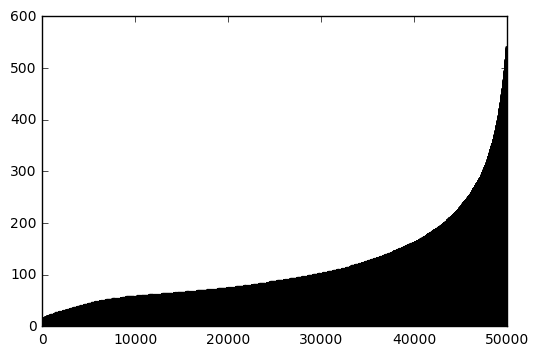

In [ ]:
# Phân phối chiều dài các câu nhận xét
%matplotlib inline
review_lengths = sorted([len(x.split()) for x in train_x] + 
                        [len(x.split()) for x in test_x])[:49900]
plt.show(plt.bar(range(len(review_lengths)), review_lengths))

## Câu hỏi 2: Chuyển biểu diễn vector cho các văn bản
- Chuyển biểu diễn vector cho các văn bản
- Các văn bản có số từ tối đa 250

In [ ]:
# Chuyển các đánh giá thành chỉ số các từ và chuẩn hóa cùng chiều dài
num_words = 250 #
vocab_processor = VocabularyProcessor(num_words).fit_transform(total_x)
total_x_vector = np.array(list(vocab_processor))

# Sinh biểu diễn vector cho các tập train và test
#### YOUR CODE HERE ####

# Đảo dữ liệu trong mỗi tập
#### YOUR CODE HERE ####

### Câu hỏi 3: Xây dựng mô hình CNN

In [ ]:
# các hyperparameters: num_classes, các lớp conv, pool, ...
epochs = 10
batch_size = 64
num_steps = int(data_set_size * 2 / batch_size * epochs) # 3900
reg_constant = 0.01
num_classes = 2
vocab_size = max([max(x) for x in total_x_vector]) + 1 # 101244
embedding_size = 128 
patch_size_1 = 3
patch_size_2 = 4
num_channels = 1
conv_depth = 128
conv_stride = [1, 1, 1, 1]
pool_stride = [1, 1, 1, 1]
padding = 'VALID'
losses = []

# Xây dựng mô hình CNN với các tham số ở trên
# Huấn luyện mô hình
# Lựa chọn và lưu mô hình đã huấn luyện
#### YOUR CODE HERE ####

### Câu hỏi 4: Load mô hình và dự đoán trên tập dữ liệu mới

In [ ]:
# tạo file test, mỗi dòng là 1 nhận xét của người dùng
# đọc dữ liệu từ file text
#### YOUR CODE HERE ####

# load mô hình từ check_point cuối cùng
#### YOUR CODE HERE ####

# Dự đoán kết quả
#### YOUR CODE HERE ####